<a href="https://colab.research.google.com/github/creymo/2022_Intro_Python/blob/main/Copie_de_W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Ocean Floats Data using Numpy and Matplotlib

**Learning Goals**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

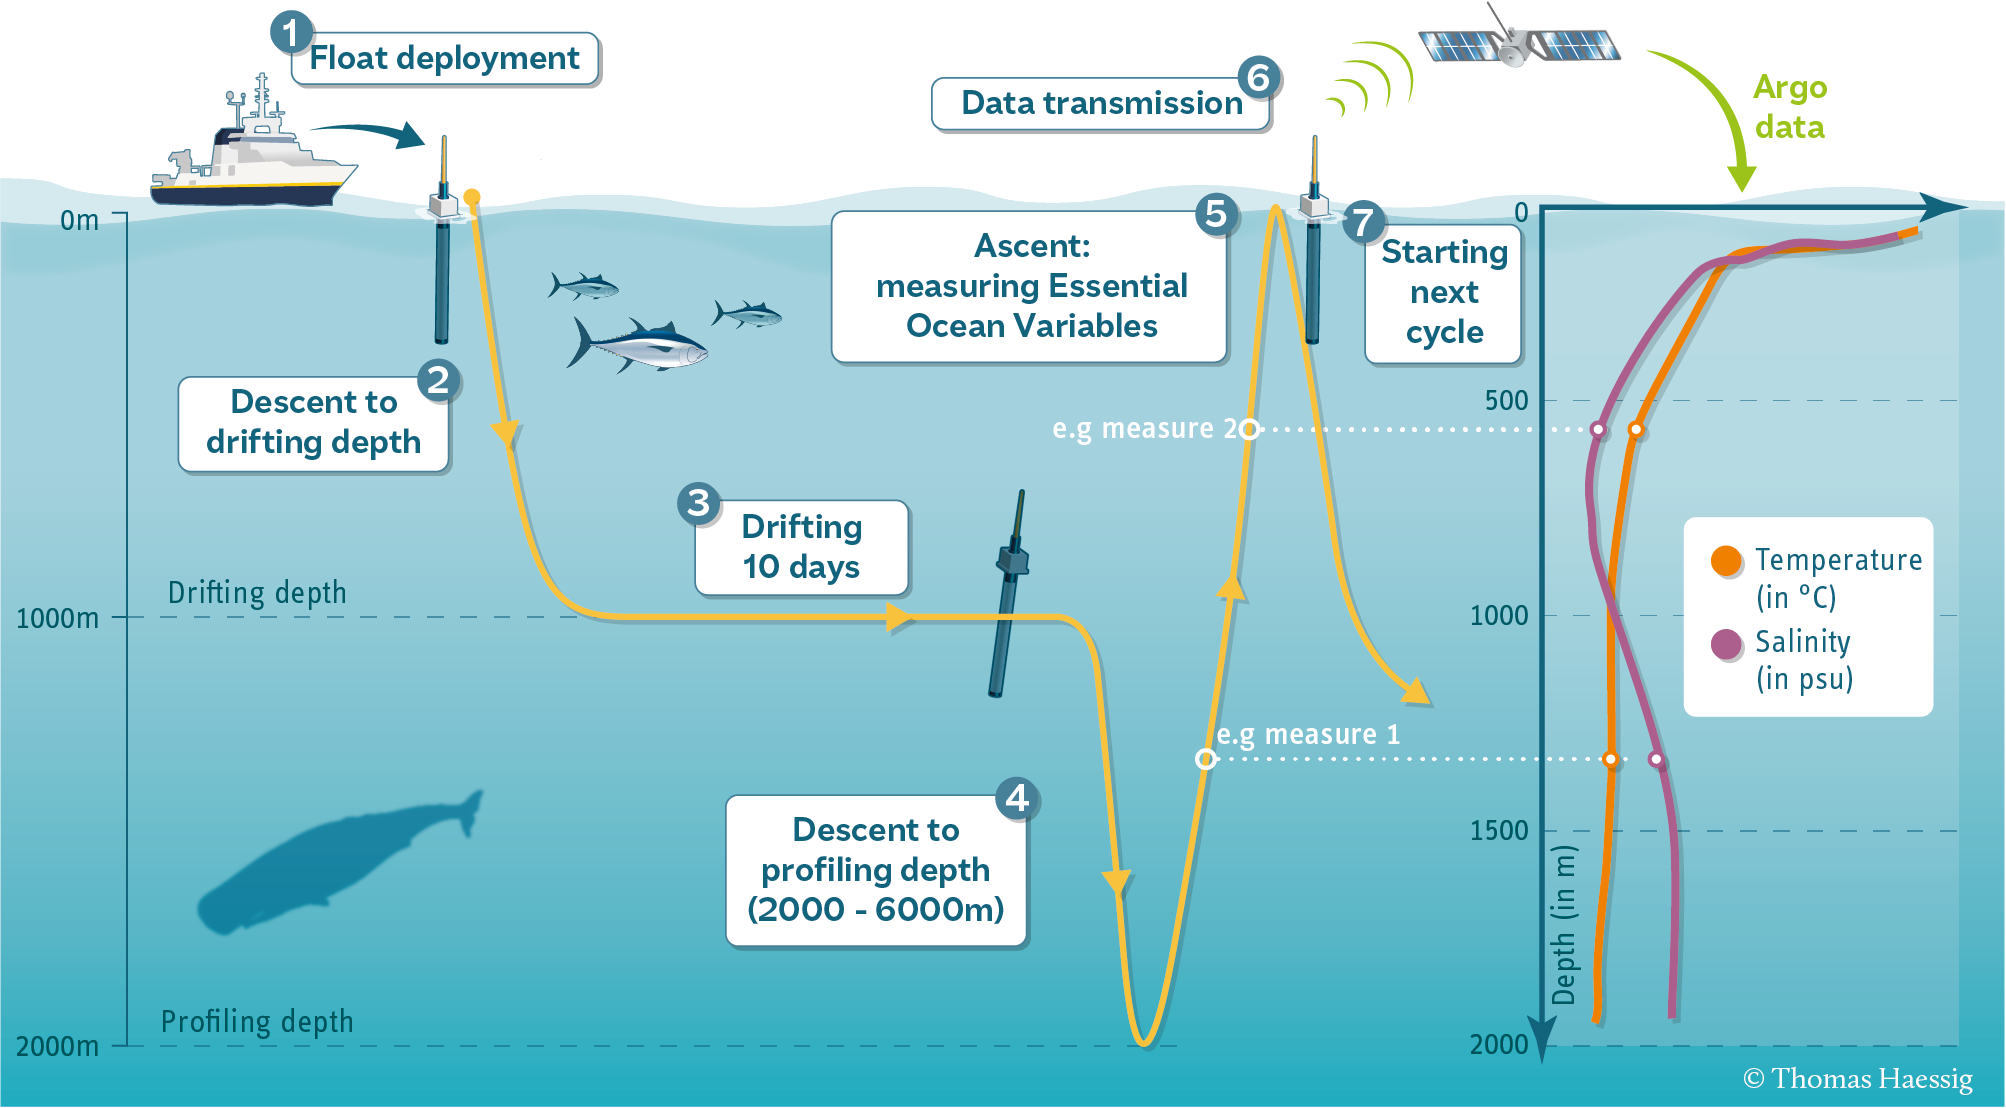


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [93]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy']

In [94]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [95]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy']

Then, load the files as `numpy` arrays, for instance using list comprehension

In [96]:
P,lat,level,date,T,lon,S = [np.load(files[i]) for i in range(7)]

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [97]:
level

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Recreate the `level` array using `np.arange` and call it `level_arange`

In [98]:
level_arange = np.arange(0,78)

Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [99]:
np.testing.assert_equal(level,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [100]:
level_linspace = np.linspace(0,77,78)

In [101]:
level_linspace


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [102]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [103]:
[np.load(files [i]).shape for i in range(len(files))]

[(78, 75), (75,), (78,), (75,), (78, 75), (75,), (78, 75)]

In [ ]:
___.___

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources: 

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [104]:
a = 7.718e-1 
b = -8.44e-2 
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure. 

In [105]:
!pip install gsw
from gsw import CT_from_t

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [106]:
CT = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [108]:
RD = a*S + b*T + c*T**2

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and 
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [109]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions. 

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

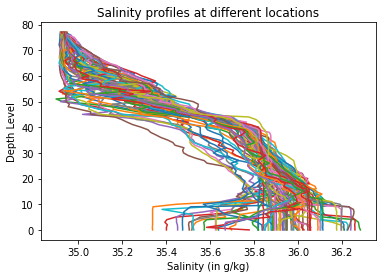

Text(0.5, 1.0, 'T in function of depth')

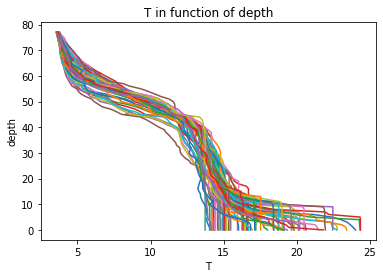

In [110]:
plt.plot(T,level); # The semi-colon prevents printing the line objects
plt.xlabel("T") # Takes a string as argument
plt.ylabel("depth")
plt.title("T in function of depth")

Make more plots below:

Text(0.5, 1.0, 'P in function of depth')

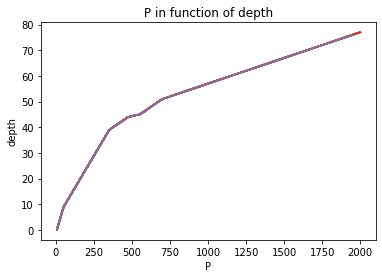

In [111]:
plt.plot(P,level); # The semi-colon prevents printing the line objects
plt.xlabel("P") # Takes a string as argument
plt.ylabel("depth")
plt.title("P in function of depth")

Text(0.5, 1.0, 'S in function of depth')

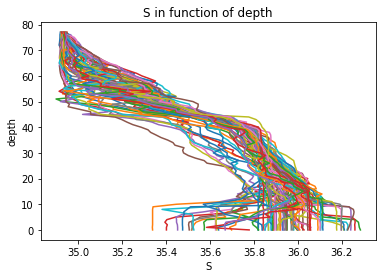

In [112]:
plt.plot(S,level); # The semi-colon prevents printing the line objects
plt.xlabel("S") # Takes a string as argument
plt.ylabel("depth")
plt.title("S in function of depth")

Text(0.5, 1.0, 'RD in function of depth')

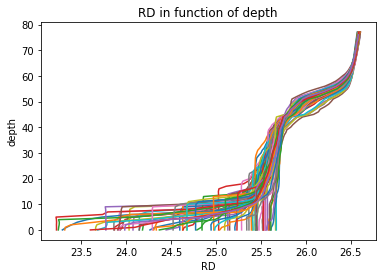

In [113]:
plt.plot(RD,level); # The semi-colon prevents printing the line objects
plt.xlabel("RD") # Takes a string as argument
plt.ylabel("depth")
plt.title("RD in function of depth")

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [114]:
T_mean = np.mean(T,axis=1)
print(T_mean.shape)
print(level.shape)


(78,)
(78,)


In [115]:
S_mean = np.mean(S,axis=1)
P_mean = np.mean(P,axis=1)
RD_mean = np.mean(RD,axis=1)
print(S_mean.shape)
print(level.shape)

(78,)
(78,)


... and the standard deviations.

In [116]:
T_std = np.std(T,axis=1)
S_std = np.std(S,axis=1)
P_std = np.std(P,axis=1)
RD_std = np.std(RD,axis=1)
print(S_std.shape)
print(level.shape)

(78,)
(78,)


Check that they have the same shape as your vertical level `lev` coordinate:

In [117]:
np.testing.assert_equal(T_mean.shape,level.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

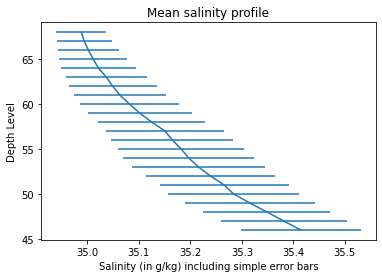

In [124]:
T.shape

(78, 75)

Text(0.5, 1.0, 'mean T at each depth')

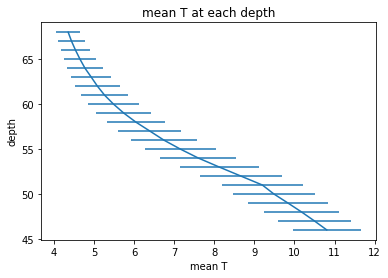

In [125]:
plt.errorbar(T_mean,level,xerr=T_std)
plt.xlabel("mean T")
plt.ylabel("depth")
plt.title("mean T at each depth")

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'mean S at each depth')

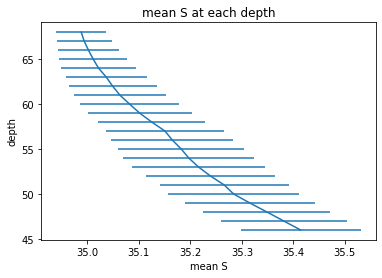

In [126]:
plt.errorbar(S_mean,level,xerr=S_std)
plt.xlabel("mean S")
plt.ylabel("depth")
plt.title("mean S at each depth")

Text(0.5, 1.0, 'mean P at each depth')

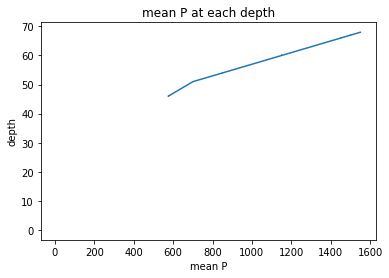

In [127]:
plt.errorbar(P_mean,level,xerr=P_std)
plt.xlabel("mean P")
plt.ylabel("depth")
plt.title("mean P at each depth")

Text(0.5, 1.0, 'mean RD at each depth')

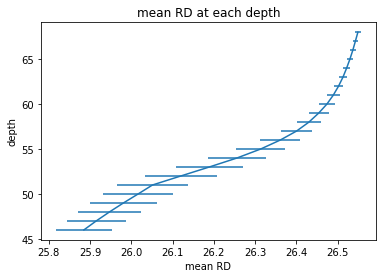

In [128]:
plt.errorbar(RD_mean,level,xerr=RD_std)
plt.xlabel("mean RD")
plt.ylabel("depth")
plt.title("mean RD at each depth")

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [132]:
np.nanmean(T,axis=1)
np.nanmean(P,axis=1)
np.nanmean(S,axis=1)
np.nanmean(RD,axis=1)

array([24.77479856, 24.78047095, 24.79606061, 24.81932871, 24.867985  ,
       24.92664313, 24.99521457, 25.07810479, 25.14984936, 25.18558603,
       25.28514089, 25.33849293, 25.38521414, 25.41493492, 25.44550926,
       25.46447945, 25.4805575 , 25.49389154, 25.50641957, 25.51778602,
       25.52934505, 25.53816822, 25.54653254, 25.55684179, 25.56674408,
       25.5755684 , 25.58364556, 25.59041562, 25.59715744, 25.60426689,
       25.61134816, 25.617998  , 25.62587186, 25.63358632, 25.64112845,
       25.64843369, 25.65545502, 25.66278978, 25.67009198, 25.67753584,
       25.69678367, 25.71471274, 25.73441348, 25.75628393, 25.77828731,
       25.85602956, 25.88493155, 25.91488721, 25.94689195, 25.98072265,
       26.01632881, 26.05116267, 26.11970308, 26.18863576, 26.25565252,
       26.31309744, 26.36067218, 26.40019279, 26.43019479, 26.45378533,
       26.47368704, 26.48923185, 26.50198276, 26.51267222, 26.52148119,
       26.52945621, 26.53654337, 26.54276568, 26.54880449, 26.55

Similarly, recalculate the standard deviations ignoring the missing values.

In [135]:
np.nanstd(T,axis=1)
np.nanstd(P,axis=1)
np.nanstd(S,axis=1)
np.nanstd(RD,axis=1)

array([0.72729242, 0.7115827 , 0.70188945, 0.67989898, 0.64242159,
       0.59504649, 0.53212086, 0.47367522, 0.41157687, 0.39543318,
       0.26486816, 0.2177055 , 0.17201076, 0.15280606, 0.12310049,
       0.11284724, 0.10442096, 0.09699513, 0.08631444, 0.08296713,
       0.07903025, 0.07724171, 0.0753387 , 0.0707889 , 0.06654666,
       0.06372322, 0.06168172, 0.05984316, 0.05882836, 0.05652566,
       0.05421327, 0.05249316, 0.04989058, 0.04784827, 0.0452393 ,
       0.04325253, 0.04197471, 0.04051502, 0.03995536, 0.0383752 ,
       0.03841328, 0.04037553, 0.04177254, 0.04360103, 0.0486425 ,
       0.06269756, 0.06713916, 0.07119228, 0.07695424, 0.08188329,
       0.08474907, 0.08676917, 0.08661842, 0.08070776, 0.06995429,
       0.06025454, 0.04838622, 0.037294  , 0.02946227, 0.02452613,
       0.0193444 , 0.0151941 , 0.01167031, 0.00981225, 0.00877662,
       0.00788945, 0.00700923, 0.00664878, 0.00645571, 0.00673563,
       0.00675401, 0.00686175, 0.0072746 , 0.00737915, 0.00748

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface. 

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'latitue in function of longitude')

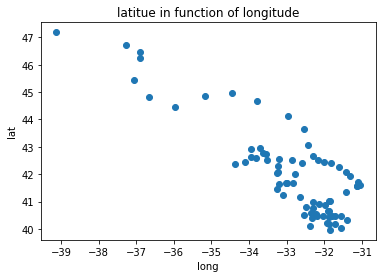

In [138]:
plt.scatter(lon,lat)
plt.xlabel("long") # Fancy bonuses
plt.ylabel("lat") # More fancy bonuses
plt.title("latitue in function of longitude")
